# Otto Group Product Classification Challenge
Classify products into the correct category

# Preparación de la base

In [1]:
#### Proyecto deep learning
#### Presentado por: 
#### Jhon Pablo Calvo
#### Edgar Andrés García
#### Camilo Alejandro Rodríguez
#### Juan Carlos Erazo
#### Otto Group Product Classification Challenge (kaggle Competition)

In [ ]:
#### Se elige una competencia para un modelo de clasificación, en donde una distribuidora comercial a nivel mundial de
#### millones de productos, los cuales se deben clasificar en una categoria especifica de acuerdo a distintas propiedades
#### y su desempeño. hoy en dia la compañia tiene el problema de clasificar mal sus productos debido a la gtan cantidad
#### de estos los cuales tienen ciertas similitudes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Importación de datos
train = pd.read_csv('D:/Desktop/deep learning/proyecto/PROYECTO KAGGLE1/inputs/train.csv')
test = pd.read_csv('D:/Desktop/deep learning/proyecto/PROYECTO KAGGLE1/inputs/test.csv')
sample=pd.read_csv('D:/Desktop/deep learning/proyecto/PROYECTO KAGGLE1/inputs/sampleSubmission.csv')

In [3]:
train.keys()

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [4]:
train.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,...,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,...,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,Class_1


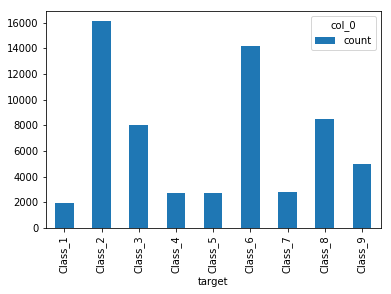

In [6]:
my_tmy_tab = pd.crosstab(index = train["target"],  # Make a crosstab
                              columns="count")      # Name the count column
my_tmy_tab.plot.bar()

# Gráfico de categorías en la base de entrenamiento

In [7]:
train.target.value_counts()
#equivalente a levels

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [8]:
# Revisión de valores faltantes
train.isnull().sum().sum()
# No hay valores faltantes en la base de entrenamiento

0

In [9]:
# Revisión de valores faltantes
test.isnull().sum().sum()
# No hay valores faltantes en la base de pruebas

0

In [10]:
summary=train.describe()
summary

# Descripción de los datos

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [11]:
train.head(10)

# Encabezado de los datos

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,...,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,...,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,...,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,Class_1


In [12]:
# Definición de características en la base de entrenamiento
feature_cols = train.columns[train.columns.str.startswith('C') == False].drop('id').drop('target')
feature_cols

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82', 'feat_83'

In [13]:
# Codificación de las características en la base de entrenamiento
# X representa las características predictivas, y la variable dependiente

from sklearn.preprocessing import LabelEncoder
# define X and y
X = train[feature_cols]
y = train.target
y=LabelEncoder().fit_transform(y)
test = test.drop('id', axis=1)

# Random Forests

0.7798157724628313 0.7643422753716871 0.7722797753716872 0.002517960653050326


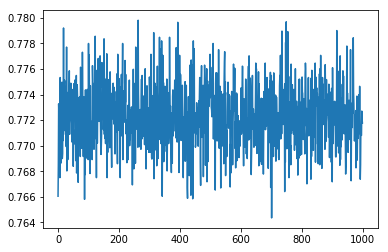

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import matplotlib.pyplot as plt

accuracy = []
for i in range(1000):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=i)

    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = float((y_pred == y_test).mean())
    accuracy.append(acc)

plt.plot(list(range(1000)), accuracy)

accuracy = np.array(accuracy)
print(accuracy.max(), accuracy.min(), accuracy.mean(), accuracy.std())

In [15]:
# train a random forest classifier with calibration
from sklearn import ensemble, feature_extraction, preprocessing
from sklearn.calibration import CalibratedClassifierCV
clf = ensemble.RandomForestClassifier(n_estimators=180, n_jobs=-1)
calibrated_clf = CalibratedClassifierCV(clf, method='isotonic')
calibrated_clf.fit(X, y)


CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
            cv=3, method='isotonic')

In [16]:
pred_rf = calibrated_clf.predict(test)
pd.crosstab(pred_rf,"count")

col_0,count
row_0,
0,2914
1,42151
2,16551
3,4365
4,6344
5,33120
6,6594
7,20448
8,11881


In [17]:
pred_rf=pd.get_dummies(pred_rf)
pred_rf.columns=sample.columns[1:10]
pred_rf.to_csv('pred_rf.csv', index_label='id')

## Regresion logística

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble, feature_extraction, preprocessing
import os
from sklearn.calibration import CalibratedClassifierCV

clf2 = LogisticRegression()

clf2 = CalibratedClassifierCV(clf2, method='isotonic', cv=5)
clf2.fit(X,y)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
            cv=5, method='isotonic')

In [19]:
np.seterr(divide='ignore', invalid='ignore')
pred_lr = clf2.predict(test)
pd.crosstab(pred_lr,"count")

col_0,count
row_0,
0,1812
1,54121
2,8781
3,1403
4,6318
5,33391
6,5616
7,20799
8,12127


In [20]:
pred_lr=pd.get_dummies(pred_lr)
pred_lr.columns=sample.columns[1:10]
pred_lr.to_csv('pred_lr.csv', index_label='id')

## Redes Neuronales

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

clf4 = Sequential()
clf4.add(Dense(32, activation='relu', input_dim=93))
clf4.add(Dense(9, activation='sigmoid'))
clf4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf4.fit(X, to_categorical(y,num_classes=9), epochs=50)

C:\Users\Usuario\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/50
61878/61878 [==============================] - 4s 64us/step - loss: 0.8020 - acc: 0.7200
Epoch 2/50
61878/61878 [==============================] - 3s 51us/step - loss: 0.6104 - acc: 0.7676
Epoch 3/50
61878/61878 [==============================] - 3s 52us/step - loss: 0.5817 - acc: 0.7758
Epoch 4/50
61878/61878 [==============================] - 3s 52us/step - loss: 0.5637 - acc: 0.7795
Epoch 5/50
61878/61878 [==============================] - 3s 52us/step - loss: 0.5514 - acc: 0.7837
Epoch 6/50
61878/61878 [==============================] - 3s 54us/step - loss: 0.5411 - acc: 0.7860
Epoch 7/50
61878/61878 [==============================] - 3s 51us/step - loss: 0.5335 - acc: 0.7877: 1s
Epoch 8/50
61878/61878 [==============================] - 3s 51us/step - loss: 0.5269 - acc: 0.7891
Epoch 9/50
61878/61878 [==============================] - 3s 51us/step - loss: 0.5217 - acc: 0.7922
Epoch 10/50
61878/61878 [==============================] - 3s 51us/step - loss: 0.5160 - acc: 0.

In [22]:
pred_rn=clf4.predict(test)

In [23]:
pred_rn=pd.DataFrame(pred_rn)
pred_rn.columns=sample.columns[1:10]
pred_rn.to_csv('pred_rn.csv', index_label='id')